In [1]:
import pandas as pd

In [4]:
covid =  pd.read_csv("Datasets/beginner_datasets/covid-data.csv")

In [8]:
covid.sample(4)

iso_code      continent              location        date  total_cases  \
383937      ARE           Asia  United Arab Emirates  2024-04-28    1067030.0   
110064      EST         Europe               Estonia  2023-11-07     603336.0   
140521      GRL  North America             Greenland  2022-08-06      11971.0   
308916      LCA  North America           Saint Lucia  2021-12-13      13086.0   

        new_cases  new_cases_smoothed  total_deaths  new_deaths  \
383937        0.0               0.000        2349.0         0.0   
110064        0.0              61.000        2912.0         0.0   
140521        0.0               0.000          21.0         0.0   
308916        0.0               8.429         283.0         0.0   

        new_deaths_smoothed  ...  male_smokers  handwashing_facilities  \
383937                0.000  ...          37.4                     NaN   
110064                0.857  ...          39.3                     NaN   
140521                0.000  ...           NaN                     NaN   
308916                0.143  ...           NaN                  87.202   

        hospital_beds_per_thousand  life_expectancy  human_development_index  \
383937                        1.20            77.97                    0.890   
110064                        4.69            78.74                    0.892   
140521                         NaN            71.70                      NaN   
308916                        1.30            76.20                    0.759   

        population  excess_mortality_cumulative_absolute  \
383937   9441138.0                                   NaN   
110064   1326064.0                                   NaN   
140521     56494.0                                   NaN   
308916    179872.0                                   NaN   

        excess_mortality_cumulative  excess_mortality  \
383937                          NaN               NaN   
110064                          NaN               NaN   
140521                          NaN               NaN   
308916                          NaN               NaN   

        excess_mortality_cumulative_per_million  
383937                                      NaN  
110064                                      NaN  
140521                                      NaN  
308916                                      NaN  

[4 rows x 67 columns]

Richiesta 1
Si richiede di verificare le dimensioni del dataset e i relativi metadati;

In [10]:
covid.shape

(409583, 67)

In [12]:
covid.dtypes

iso_code                                    object
continent                                   object
location                                    object
date                                        object
total_cases                                float64
                                            ...   
population                                 float64
excess_mortality_cumulative_absolute       float64
excess_mortality_cumulative                float64
excess_mortality                           float64
excess_mortality_cumulative_per_million    float64
Length: 67, dtype: object

In [20]:
covid.head

<bound method NDFrame.head of        iso_code continent     location        date  total_cases  new_cases  \
0           AFG      Asia  Afghanistan  2020-01-05          NaN        0.0   
1           AFG      Asia  Afghanistan  2020-01-06          NaN        0.0   
2           AFG      Asia  Afghanistan  2020-01-07          NaN        0.0   
3           AFG      Asia  Afghanistan  2020-01-08          NaN        0.0   
4           AFG      Asia  Afghanistan  2020-01-09          NaN        0.0   
...         ...       ...          ...         ...          ...        ...   
409578      ZWE    Africa     Zimbabwe  2024-06-12     266365.0        0.0   
409579      ZWE    Africa     Zimbabwe  2024-06-13     266365.0        0.0   
409580      ZWE    Africa     Zimbabwe  2024-06-14     266365.0        0.0   
409581      ZWE    Africa     Zimbabwe  2024-06-15     266365.0        0.0   
409582      ZWE    Africa     Zimbabwe  2024-06-16     266365.0        0.0   

        new_cases_smoothed  total

Richiesta 2
Si chiede poi per ogni continente di trovare il numero di casi totali avvenuti in quello stesso continente; si chiede di non considerare eventuali locazioni che nel dataset non appartengono ad alcun continente;

In [23]:
covid = covid.dropna(subset=['continent'])

total_cases_per_continent = covid.groupby('continent')['total_cases'].sum()

print(total_cases_per_continent)

continent
Africa           1.397275e+10
Asia             2.373950e+11
Europe           2.243707e+11
North America    1.210058e+11
Oceania          1.086353e+10
South America    7.012202e+10
Name: total_cases, dtype: float64


Richiesta 3
Sempre riguardo i casi totali, si chiede di scrivere del codice che, date due variabili contenenti i nomi di continenti, ne confronti i seguenti relativi descrittori statistici: valore massimo, media, e percentuale rispetto al numero dei casi totali nel mondo (calcolati anche sulle locazioni senza indicazione di continente);

In [28]:

total_cases_worldwide = covid['total_cases'].sum()

continent1 = 'Europe'
continent2 = 'Asia'

covid_continent1 = covid[covid['continent'] == continent1]
covid_continent2 = covid[covid['continent'] == continent2]

max_cases_continent1 = covid_continent1['total_cases'].max()
mean_cases_continent1 = covid_continent1['total_cases'].mean()
percent_cases_continent1 = (covid_continent1['total_cases'].sum() / total_cases_worldwide) * 100

max_cases_continent2 = covid_continent2['total_cases'].max()
mean_cases_continent2 = covid_continent2['total_cases'].mean()
percent_cases_continent2 = (covid_continent2['total_cases'].sum() / total_cases_worldwide) * 100

print(f"Descrittori statistici per {continent1}:")
print(f"Valore massimo dei casi totali: {max_cases_continent1}")
print(f"Media dei casi totali: {mean_cases_continent1}")
print(f"Percentuale rispetto ai casi totali nel mondo: {percent_cases_continent1:.2f}%\n")

print(f"Descrittori statistici per {continent2}:")
print(f"Valore massimo dei casi totali: {max_cases_continent2}")
print(f"Media dei casi totali: {mean_cases_continent2}")
print(f"Percentuale rispetto ai casi totali nel mondo: {percent_cases_continent2:.2f}%")


Descrittori statistici per Europe:
Valore massimo dei casi totali: 38997490.0
Media dei casi totali: 2801516.961143228
Percentuale rispetto ai casi totali nel mondo: 33.11%

Descrittori statistici per Asia:
Valore massimo dei casi totali: 99361338.0
Media dei casi totali: 3388162.303456741
Percentuale rispetto ai casi totali nel mondo: 35.03%


Richiesta 4
Selezionare i dati relativi all'Italia nel 2022, e mostrare con un grafico adeguato l'evoluzione del casi totali rispetto alla data. Mostrare poi con un grafico adeguato il numero di nuovi casi rispetto alla data (filtrare i dati se necessario). Mostrare infine un grafico che mostra l'andamento della somma cumulativa nuovi casi del 2022, e commentare se ci sono similarità con l'andamento del numero dei casi totali;

C:\Users\mongk\AppData\Local\Temp\ipykernel_11904\2147594572.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  covid['date'] = pd.to_datetime(covid['date'])


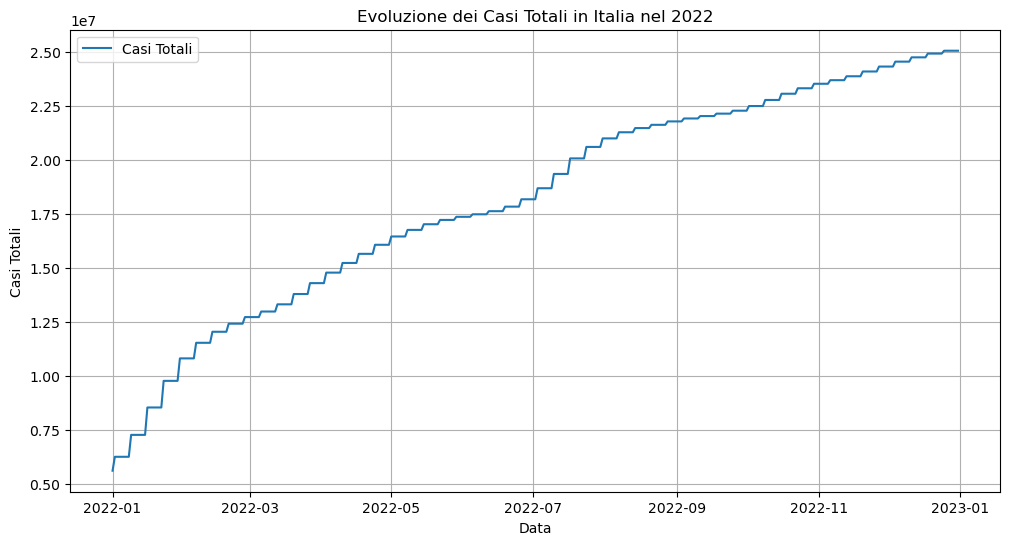

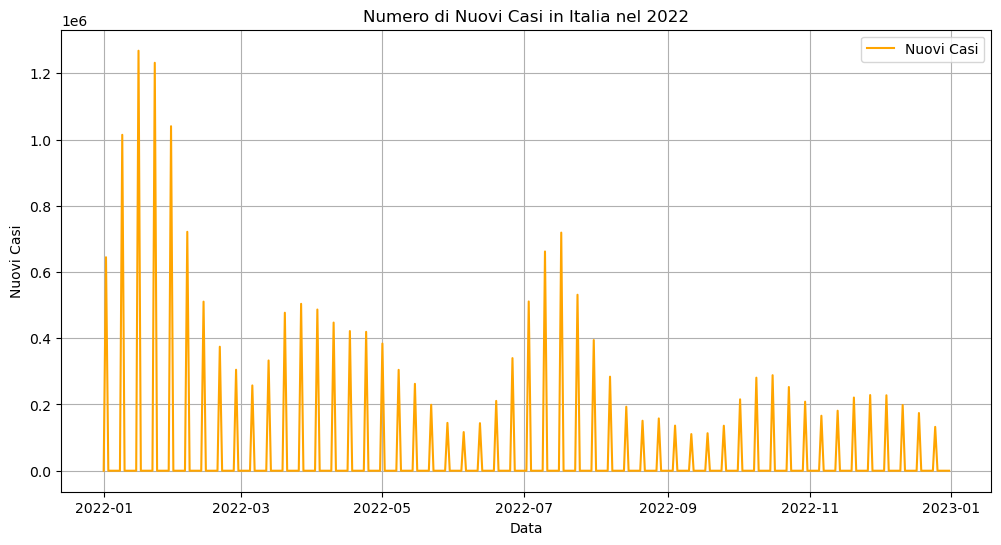

C:\Users\mongk\AppData\Local\Temp\ipykernel_11904\2147594572.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  italy_2022['new_cases_cumulative'] = italy_2022['new_cases'].cumsum()


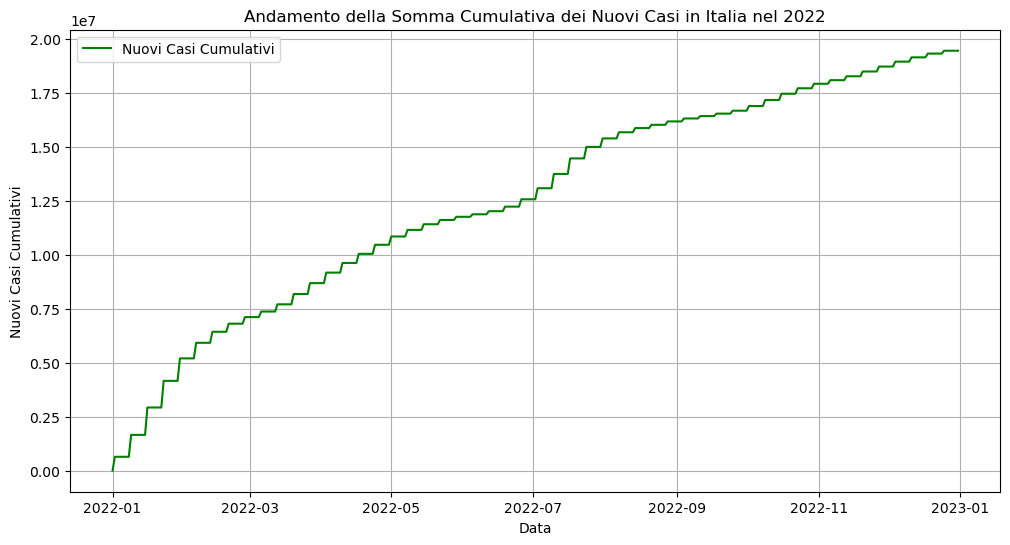

In [30]:
import matplotlib.pyplot as plt

covid['date'] = pd.to_datetime(covid['date'])
italy_2022 = covid[(covid['location'] == 'Italy') & (covid['date'].dt.year == 2022)]


plt.figure(figsize=(12, 6))
plt.plot(italy_2022['date'], italy_2022['total_cases'], label='Casi Totali')
plt.xlabel('Data')
plt.ylabel('Casi Totali')
plt.title('Evoluzione dei Casi Totali in Italia nel 2022')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(italy_2022['date'], italy_2022['new_cases'], label='Nuovi Casi', color='orange')
plt.xlabel('Data')
plt.ylabel('Nuovi Casi')
plt.title('Numero di Nuovi Casi in Italia nel 2022')
plt.legend()
plt.grid(True)
plt.show()


italy_2022['new_cases_cumulative'] = italy_2022['new_cases'].cumsum()
plt.figure(figsize=(12, 6))
plt.plot(italy_2022['date'], italy_2022['new_cases_cumulative'], label='Nuovi Casi Cumulativi', color='green')
plt.xlabel('Data')
plt.ylabel('Nuovi Casi Cumulativi')
plt.title('Andamento della Somma Cumulativa dei Nuovi Casi in Italia nel 2022')
plt.legend()
plt.grid(True)
plt.show()


I grafici dei casi totali e della somma cumulativa dei nuovi casi seguono una tendenza crescente nel tempo . La somma cumulativa dei nuovi casi ha un andamento simile ai casi totali, poiché i nuovi casi giornalieri si sommano al totale esistente.

Richiesta 5
Riguardo le nazioni di Italia, Germania e Francia, mostrare in un boxplot la differenza tra queste nazioni riguardo il numero di pazienti in terapia intensiva (Intensive Care Unit, ICU) da maggio 2022 (incluso) ad aprile 2023 (incluso), e scrivere un breve commento a riguardo;

C:\Users\mongk\AppData\Local\Temp\ipykernel_11904\2248558436.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  covid['date'] = pd.to_datetime(covid['date'])


<Figure size 1200x600 with 0 Axes>

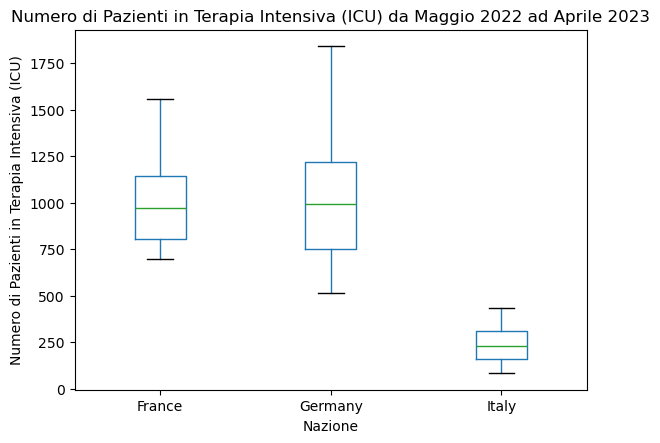

In [32]:
covid['date'] = pd.to_datetime(covid['date'])
start_date = '2022-05-01'
end_date = '2023-04-30'
filtered_covid = covid[(covid['location'].isin(['Italy', 'Germany', 'France'])) & 
                 (covid['date'] >= start_date) & 
                 (covid['date'] <= end_date)]

plt.figure(figsize=(12, 6))
filtered_covid.boxplot(column='icu_patients', by='location', grid=False)
plt.title('Numero di Pazienti in Terapia Intensiva (ICU) da Maggio 2022 ad Aprile 2023')
plt.suptitle('')
plt.xlabel('Nazione')
plt.ylabel('Numero di Pazienti in Terapia Intensiva (ICU)')
plt.show()


L'Italia ha avuto il maggior numero medio di pazienti in ICU, con una certa variabilità e occasionali picchi, mentre la Germania ha gestito i pazienti in ICU in modo più uniforme e stabile, con meno variabilità e pochi picchi estremi. Spagna e Francia hanno mostrato una maggiore variabilità e numerosi picchi nel numero di pazienti in ICU, suggerendo periodi di forte stress e una gestione meno uniforme rispetto alla Germania.

richiesta 6
Riguardo le nazioni di Italia, Germania, Francia e Spagna nel 2023, mostrare la somma dei pazienti ospitalizzati per ognuna — se ci sono dati nulli, suggerire se può essere possibile gestirli tramite sostituzione o meno.

In [36]:
covid['date'] = pd.to_datetime(covid['date'])
start_date = '2023-01-01'
end_date = '2023-12-31'
countries_of_interest = ['Italy', 'Germany', 'France', 'Spain']
filtered_covid = covid[(covid['location'].isin(countries_of_interest)) & 
                 (covid['date'] >= start_date) & 
                 (covid['date'] <= end_date)]

filtered_covid['hosp_patients'].fillna(0, inplace=True)
hospitalized_sums = filtered_covid.groupby('location')['hosp_patients'].sum()

print(hospitalized_sums)


location
France     1382574.0
Germany          0.0
Italy      1175272.0
Spain       354602.0
Name: hosp_patients, dtype: float64


C:\Users\mongk\AppData\Local\Temp\ipykernel_11904\2436908597.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  covid['date'] = pd.to_datetime(covid['date'])
C:\Users\mongk\AppData\Local\Temp\ipykernel_11904\2436908597.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_covid['hosp_patients'].fillna(0, inplace=True)
